In [ ]:
!pip install ucimlrepo
!pip install scikit-learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from ucimlrepo import fetch_ucirepo


In [ ]:
# Descarga del dataset
wine_quality = fetch_ucirepo(id=186)
# Datos brutos en formato Dataframe de pandas
X = wine_quality.data.features
y = wine_quality.data.targets

In [18]:
# Convertir la calidad en variable categórica para clasificación
y_classification = y.copy()
y_classification = (y["quality"] >= 6).astype(int).ravel()

In [ ]:
# Dividir los datos en entrenamiento y prueba
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_classification, test_size=0.2, random_state=42)

In [ ]:
# Escalar los datos
scaler = StandardScaler()
X_train_clf = scaler.fit_transform(X_train_clf)
X_test_clf = scaler.transform(X_test_clf)

In [ ]:
# Crear el modelo de Random Forest
rf_classifier = RandomForestClassifier(
    n_estimators=100,  # Número de árboles en el bosque
    max_depth=20,      # Profundidad máxima del árbol
    min_samples_split=5,  # Mínimo de muestras para dividir un nodo
    min_samples_leaf=2,   # Mínimo de muestras en una hoja final
    random_state=42,
     max_features='log2'
)

# Entrenar el modelo
rf_classifier.fit(X_train_clf, y_train_clf)

# Realizar las predicciones
y_pred_clf = rf_classifier.predict(X_test_clf)

In [ ]:
# Cálculo de métricas de clasificación
accuracy = accuracy_score(y_test_clf, y_pred_clf)
precision = precision_score(y_test_clf, y_pred_clf, average="micro")
recall = recall_score(y_test_clf, y_pred_clf, average="micro")
f1 = f1_score(y_test_clf, y_pred_clf, average="micro")
conf_matrix = confusion_matrix(y_test_clf, y_pred_clf)

# Impresión de resultados
print(f"Clasificación - Accuracy: {accuracy:.4f}")
print(f"Clasificación - Precision: {precision:.4f}")
print(f"Clasificación - Recall: {recall:.4f}")
print(f"Clasificación - F1-Score: {f1:.4f}")
print("Clasificación - Matriz de Confusión:")
print(conf_matrix)

Clasificación - Accuracy: 0.8169
Clasificación - Precision: 0.8169
Clasificación - Recall: 0.8169
Clasificación - F1-Score: 0.8169
Clasificación - Matriz de Confusión:
[[326 125]
 [113 736]]


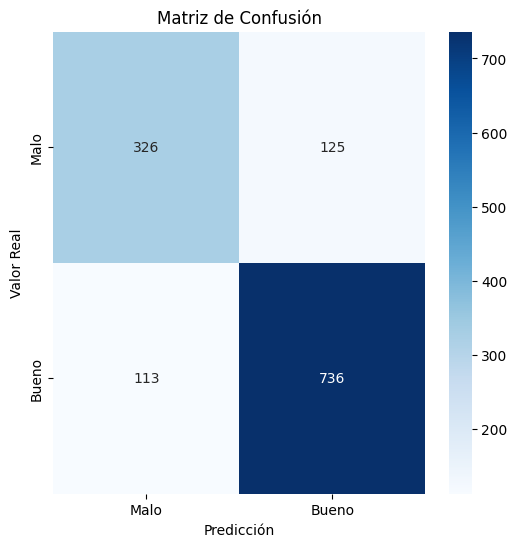

In [ ]:
# Visualización de la matriz de confusión
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Malo", "Bueno"], yticklabels=["Malo", "Bueno"])
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión")
plt.show()